In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df2 = df.rename(columns={"sex":"Gender"})

In [6]:
df2

,age,Gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df2["Gender"].value_counts().keys()

Index(['male', 'female'], dtype='object', name='Gender')

In [8]:
df2["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [9]:
male = df2[df2["Gender"]=="male"]
male

,age,Gender,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1327,51,male,30.030,1,no,southeast,9377.90470
1329,52,male,38.600,2,no,southwest,10325.20600


In [10]:
female = df2[df2["Gender"]=="female"]
female

,age,Gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [11]:
male["charges"].mean()

13956.751177721893

In [12]:
female["charges"].mean()

12569.578843835347

In [13]:
female["charges"].mean()

12569.578843835347

In [14]:
less_the_avg = female[female["charges"]<=12569.578843835347]
less_the_avg

,age,Gender,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
13,56,female,39.82,0,no,southeast,11090.71780
16,52,female,30.78,1,no,northeast,10797.33620
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350


In [15]:
less_the_avg["smoker"].value_counts()

smoker
no    441
Name: count, dtype: int64

In [16]:
# feature engineering  
# < 18.5   ==> underweight 
# 18.5 to 24.  ==> HealthyWeight 
# 25.0 to 29.9  ==> overweight

In [17]:
a =list(df2["bmi"])
type(a)

list

In [18]:
ls = list(df2['bmi'])
label = []
for w in ls:
    if w<18.5:
        label.append('Underweight')
    elif w >18.5 and w<24.9:
        label.append('HealthyWeight')
    elif w>25.0 and w <29.9:
        label.append('Overweight')
    else:
        label.append('obese')


In [19]:
df2["health"] = label
df2

,age,Gender,bmi,children,smoker,region,charges,health
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


In [20]:
heath_group = df2.groupby("health")


In [21]:
analysis = heath_group["charges"].agg(min ="min",mean="mean",max ="max")

In [22]:
analysis.sort_values("min")

,min,mean,max
health,,,
HealthyWeight,1121.8739,10404.900084,35069.37452
obese,1131.5066,15420.399577,63770.42801
Overweight,1252.4070,11020.183782,38245.59327
Underweight,1621.3402,8852.200585,32734.18630


In [23]:
health_ana = list(analysis.index)
health_avg = (analysis["mean"].values)

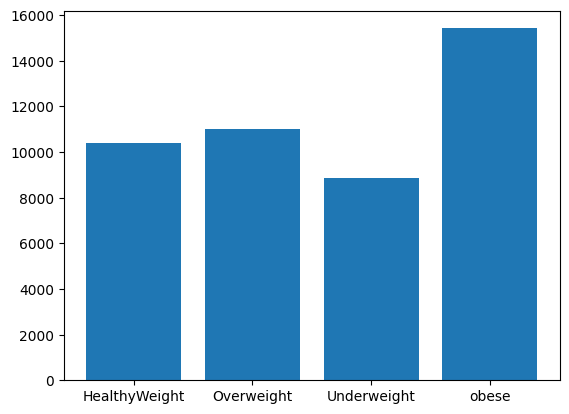

In [24]:
plt.bar(health_ana,health_avg)
plt.show()

In [25]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [26]:
r_group = df.groupby('region')['charges'].agg(['min', 'max', 'mean'])
r_group

,min,max,mean
region,,,
northeast,1694.7964,58571.07448,13406.384516
northwest,1621.3402,60021.39897,12417.575374
southeast,1121.8739,63770.42801,14735.411438
southwest,1241.5650,52590.82939,12346.937377


In [27]:
region = list(r_group.index)
avg = (r_group["mean"].values)

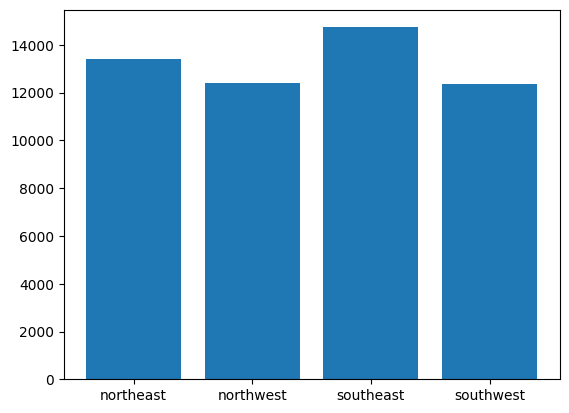

In [28]:
plt.bar(region,avg)
plt.show()

In [29]:
df2["region"].value_counts().keys()

    

Index(['southeast', 'southwest', 'northwest', 'northeast'], dtype='object', name='region')

In [30]:
gender_dict ={'male':1,'female':0}
smoke_dict = {"yes":1,"no":0}
health_dict = {'Underweight':1,'HealthyWeight':2, 'Overweight':3,'obese':4}
region_dict = {'southeast':1,'southwest':2,'northwest':3,'northeast':4}

In [31]:
# df2["Gender"] = df2["Gender"].map(gender_dict)
# df2["smoker"] = df2["smoker"].map(smoke_dict)
# df2["health"] = df2["health"].map(health_dict)
# df2["region"] = df2["region"].map(region_dict)


final_data = pd.get_dummies(df2).astype(int)
final_data.head()

,age,bmi,children,charges,Gender_female,Gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,health_HealthyWeight,health_Overweight,health_Underweight,health_obese
0,19,27,0,16884,1,0,0,1,0,0,0,1,0,1,0,0
1,18,33,1,1725,0,1,1,0,0,0,1,0,0,0,0,1
2,28,33,3,4449,0,1,1,0,0,0,1,0,0,0,0,1
3,33,22,0,21984,0,1,1,0,0,1,0,0,1,0,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0,0,1,0,0


In [32]:
# vatsal code
# grp2=df2.groupby(['health'])
# m=grp2['charges'].agg(min_charges='min',max_charges='max',mean_charges='mean')
# mean1=list(m['mean_charges'].values)
# classes1=list(m['mean_charges'].index)
# plt.bar(classes1,mean1)
# plt.title("mean charges acc to health")
# avg=list(l['max_charges'].values)
# classes=list(l['max_charges'].index)
# plt.pie(avg,labels=classes,autopct="%.2f%%")
# plt.show()

In [33]:
y = final_data[["charges"]]
x = final_data.drop("charges",axis=1)
print(x.value_counts().keys)

<bound method Series.keys of age  bmi  children  Gender_female  Gender_male  smoker_no  smoker_yes  region_northeast  region_northwest  region_southeast  region_southwest  health_HealthyWeight  health_Overweight  health_Underweight  health_obese
18   38   0         1              0            1          0           0                 0                 1                 0                 0                     0                  0                   1               3
56   28   0         1              0            1          0           1                 0                 0                 0                 0                     1                  0                   0               3
18   30   0         1              0            1          0           1                 0                 0                 0                 0                     0                  0                   1               3
26   22   0         1              0            1          0           0                

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier



In [37]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
dtc = DecisionTreeClassifier()
rfr = RandomForestRegressor()
rfc = RandomForestClassifier()


In [38]:
lr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rfr.fit(x_train,y_train)
print("all trained")

c:\Users\shekh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


all trained


In [39]:
print("lr_score",lr.score(x_train,y_train))
print(lr.score(x_test,y_test))
print("dtr",dtr.score(x_train,y_train))
print(dtr.score(x_test,y_test))
print("rfr",rfr.score(x_train,y_train))
print(rfr.score(x_test,y_test))
print("all score")

lr_score 0.7677482250035647
0.7069395614233666
dtr 0.9967664608028394
0.6964444741234453
rfr 0.9775100923934241
0.7882527712567692
all score


In [40]:
# prediction
lr_p =lr.predict(x_test)
dtr_p = dtr.predict(x_test)
rfr_p =rfr.predict(x_test)

In [41]:
comparision = pd.concat([x_test,y_test],axis=1)
comparision

,age,bmi,children,Gender_female,Gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,health_HealthyWeight,health_Overweight,health_Underweight,health_obese,charges
656,26,42,1,1,0,1,0,0,0,0,1,0,0,0,1,3410
448,40,29,0,1,0,1,0,0,0,0,1,0,1,0,0,5910
41,31,36,2,1,0,1,0,0,0,1,0,0,0,0,1,4949
1219,38,30,3,1,0,1,0,0,1,0,0,0,0,0,1,7537
327,45,36,2,0,1,0,1,0,1,0,0,0,0,0,1,42760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,48,29,0,0,1,1,0,0,0,0,1,0,1,0,0,21232
1243,28,33,0,1,0,1,0,0,0,1,0,0,0,0,1,3171
922,38,31,1,0,1,1,0,0,0,0,1,0,0,0,1,5488
1022,47,36,1,0,1,0,1,0,0,1,0,0,0,0,1,42211


In [42]:
comparision["liner_pd"] = lr_p
comparision["random_pd"] = rfr_p
comparision["desison_pd"] = dtr_p
comparision


,age,bmi,children,Gender_female,Gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,health_HealthyWeight,health_Overweight,health_Underweight,health_obese,charges,liner_pd,random_pd,desison_pd
656,26,42,1,1,0,1,0,0,0,0,1,0,0,0,1,3410,7585.570041,3827.13,3227.0
448,40,29,0,1,0,1,0,0,0,0,1,0,1,0,0,5910,6395.719928,6397.33,5383.0
41,31,36,2,1,0,1,0,0,0,1,0,0,0,0,1,4949,8356.402369,4811.80,4753.0
1219,38,30,3,1,0,1,0,0,1,0,0,0,0,0,1,7537,10653.998231,7094.65,7281.0
327,45,36,2,0,1,0,1,0,1,0,0,0,0,0,1,42760,36384.421436,42553.77,42124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,48,29,0,0,1,1,0,0,0,0,1,0,1,0,0,21232,8193.466788,9494.45,8277.0
1243,28,33,0,1,0,1,0,0,0,1,0,0,0,0,1,3171,6024.124628,4675.30,2689.0
922,38,31,1,0,1,1,0,0,0,0,1,0,0,0,1,5488,8857.502128,5965.47,4646.0
1022,47,36,1,0,1,0,1,0,0,1,0,0,0,0,1,42211,35615.105436,42538.47,42124.0


In [43]:
# saving the models

import joblib,os
# os.makedirs("models",exist_ok=True)

In [44]:
joblib.dump(lr,"./models/linear.lb")
joblib.dump(dtr,"./models/descision.lb")
joblib.dump(rfr,"./models/random_f.lb")

['./models/random_f.lb']